In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Какой объем выборки взять?

https://mindbox.ru/academy/ab-test-calculator/

$$n = \frac{z^2*p*(1-p)}{error^2}$$

**p** - ожидаемое значение доли (которое ожидаем еще до проведения тестирования)

**error** - максимальная погрешность (ошибка), которую мы хотим допускать при получении
результатов

**z** - значение стандартной нормальной величины, которое соответствует выбранному
уровню доверия

In [3]:
def number_of_sample(z=0.95, p=0.5, error=0.03):
    return z ** 2 * p * (1 - p) / error ** 2
number_of_sample()

250.69444444444443

# Доверительный интервал

https://rpsychologist.com/d3/ci/

## - Доверительный интервал для доли

In [ ]:
import scipy.stats as st

In [7]:
users = np.array([1, 0, 0, 0, 1, 1, 1, 0, 1])
n = users.size 
p = users.sum() / n
se = np.sqrt(p * (1 - p) / n)
print(n, p, se, sep='\n')

9
0.5555555555555556
0.16563466499998442


In [8]:
st.norm.interval(0.95, loc=p, scale = se) 

(0.2309175775642291, 0.880193533546882)

## - Доверительный интервал для среднего

In [ ]:
import statsmodels.stats.api as stm

In [9]:
ages = np.array([23, 24, 38, 34, 36, 37, 39])

stm.DescrStatsW(ages).tconfint_mean(0.95) 

(32.834861697945676, 33.165138302054324)

# Проверка гипотез

## - Бутстрэп

In [26]:
df = pd.read_csv("conversion.csv") 

In [27]:
p_old = df['OLD'].mean() 
p_new = df['NEW'].mean()
p_new - p_old

0.6325

In [28]:
differences = np.zeros((1, 1500)) 

In [29]:
for i in range(0, 1500):
    s1 = random.choices(df['OLD'], k = 800)
    s2 = random.choices(df['NEW'], k = 800)
    p1 = np.mean(s1)
    p2 = np.mean(s2)
    differences[0][i] = p2 - p1

In [30]:
((differences - np.mean(differences)) >= 0.6325).sum() 

0

0 < 0.05 отвергаем H0 гипотезу

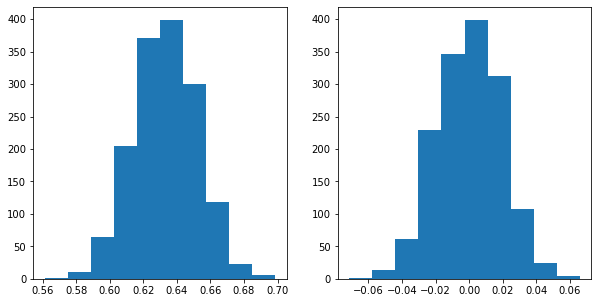

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(differences.squeeze(), bins=10)
axs[1].hist(differences.squeeze() - np.mean(differences), bins=10);

## - Статистический тест (критерий)

In [40]:
from statsmodels.stats.proportion import proportions_ztest

In [41]:
ns_old = df['OLD'].sum() 
ns_new = df['NEW'].sum()
n = df.shape[0]

In [65]:
count = np.array([ns_old, ns_new])
nobs = np.array([n, n])
zstat, pvalue = proportions_ztest(count, nobs, alternative='smaller') 
print('pvalue=', pvalue)

pvalue= 2.5535397372869267e-146


### Homework

In [52]:
df_parfume = pd.read_csv('parfume.csv', index_col=0)
df_parfume.head()

,X,id,age,group,vote
1,1,1,21,control,1
2,2,2,20,control,1
3,3,3,22,control,2
4,4,4,18,control,1
5,5,5,23,control,0


In [58]:
df_parfume = df_parfume[df_parfume.vote.isin([0, 1])]

test = df_parfume[df_parfume.group == 'test']
control = df_parfume[df_parfume.group == 'control']

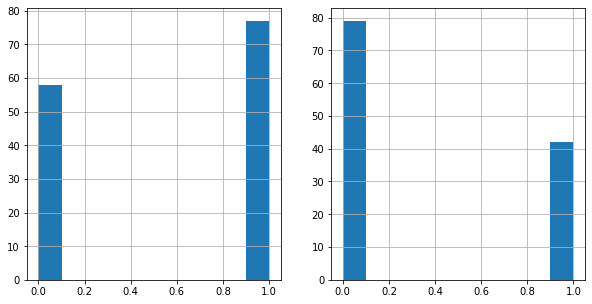

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
test.vote.hist(ax=axs[0])
control.vote.hist(ax=axs[1]);

In [66]:
count_test = test.vote.sum()
count_control = control.vote.sum()

nobs_test = test.vote.size
nobs_control = control.vote.size

In [68]:
count = np.array([count_test, count_control])
nobs = np.array([nobs_test, nobs_control])
zstat, pvalue = proportions_ztest(count, nobs, alternative='larger') 
print('pvalue=', pvalue)
if pvalue < 0.05:
    print('Отвергаем H0')
else:
    print('Оставляем H0')

pvalue= 0.00017463865746718515
Отвергаем H0
